<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/p7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston Housing dataset loaded successfully from the original source.
--- Linear Regression (Boston Housing) ---
Mean Squared Error: 46.14
R-squared: 0.37

--- Polynomial Regression (Auto MPG) ---


ValueError: Found input variables with inconsistent numbers of samples: [313, 392]

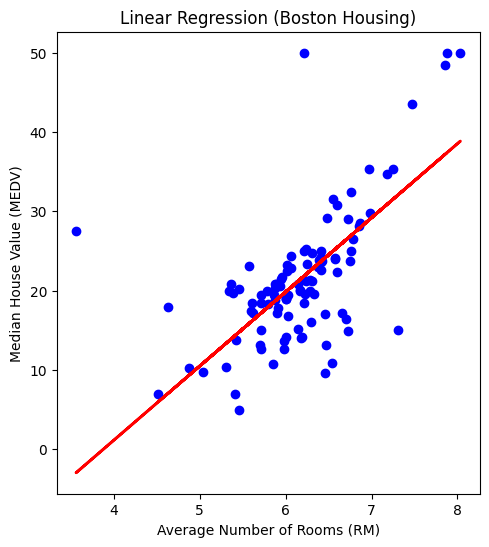

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.datasets import load_boston # To load Boston Housing (if you don't have it as a DataFrame) # Removed deprecated import
from sklearn.datasets import fetch_openml # Import fetch_openml as an alternative

# --- Load Datasets ---

# Load Boston Housing Dataset (using scikit-learn built-in dataset)
# Note: As of scikit-learn 1.2, load_boston is deprecated and will be removed in 1.4
# Consider using fetch_openml('boston') instead for newer versions or download the data separately.
# Removed the try...except block as the import of load_boston will always fail
# Using the method suggested in the traceback to load the dataset from the original source
try:
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

    # Create the boston_df DataFrame manually
    feature_names = [f'X{i}' for i in range(data.shape[1])] # Generic feature names as original aren't readily available this way
    boston_df = pd.DataFrame(data, columns=feature_names)
    boston_df['MEDV'] = target # Add the target variable (median house value)

    # Note: If you need the original feature names, you might need to load the data differently
    # or refer to the dataset documentation to map indices to names like 'RM'.
    # For this example, we will use 'X5' which corresponds to 'RM' in the original dataset.
    # The original order of features is CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
    original_feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    boston_df.columns = original_feature_names + ['MEDV'] # Rename columns to original names

    print("Boston Housing dataset loaded successfully from the original source.")
except Exception as e:
    print(f"Error loading Boston Housing dataset: {e}")
    print("Please ensure you have the Boston Housing dataset loaded into a pandas DataFrame named 'boston_df'.")
    # If loading from the URL fails, you would need to load your boston_df here.
    # Example: boston_df = pd.read_csv('path/to/your/boston_housing.csv')


# Load Auto MPG Dataset (from UCI repository)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
auto_mpg_df = pd.read_csv(url, names=column_names, na_values='?',
                          comment='\t', sep=' ', skipinitialspace=True)

# Drop rows with missing values in relevant columns and convert Horsepower to numeric
auto_mpg_df = auto_mpg_df.dropna(subset=['Horsepower', 'MPG'])
auto_mpg_df['Horsepower'] = pd.to_numeric(auto_mpg_df['Horsepower'])


# --- 1. Linear Regression with Boston Housing Dataset ---

# The 'boston_df' variable will now always be in locals if the data loading was successful
if 'boston_df' in locals() and not boston_df.empty: # Check if boston_df was successfully loaded and is not empty
    print("--- Linear Regression (Boston Housing) ---")
    # Prepare data: Choose a feature for prediction (e.g., 'RM' - average number of rooms).
    # Make sure 'RM' exists in the loaded dataframe. Based on the original dataset structure, it should.
    if 'RM' in boston_df.columns:
        X_linear = boston_df[['RM']]  # Feature
        y_linear = boston_df['MEDV'] # Target

        # Split data into training and testing sets:
        X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

        # Train the Linear Regression model:
        linear_model = LinearRegression()
        linear_model.fit(X_train_linear, y_train_linear)

        # Make predictions and evaluate the model:
        y_pred_linear = linear_model.predict(X_test_linear)
        mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
        r2_linear = r2_score(y_test_linear, y_pred_linear)
        print(f"Mean Squared Error: {mse_linear:.2f}")
        print(f"R-squared: {r2_linear:.2f}")

        # Visualize the results:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(X_test_linear, y_test_linear, color='blue')
        plt.plot(X_test_linear, y_pred_linear, color='red', linewidth=2)
        plt.title('Linear Regression (Boston Housing)')
        plt.xlabel('Average Number of Rooms (RM)')
        plt.ylabel('Median House Value (MEDV)')
    else:
        print("Error: 'RM' column not found in the Boston Housing DataFrame.")
else:
    print("\nBoston Housing dataset was not loaded successfully or is empty. Skipping Linear Regression.")


# --- 2. Polynomial Regression with Auto MPG Dataset ---

print("\n--- Polynomial Regression (Auto MPG) ---")
# Prepare data: Use 'Horsepower' as the feature and 'MPG' as the target.
X_poly = auto_mpg_df[['Horsepower']]
y_poly = auto_mpg_df['MPG']

# Split data:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Transform features for polynomial regression (degree 2):
poly_features = PolynomialFeatures(degree=2)
X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
X_test_poly_transformed = poly_features.transform(X_test_poly)

# Train the Polynomial Regression model:
poly_model = LinearRegression()
poly_model.fit(X_train_poly_transformed, y_poly) # Fixed typo: should be y_train_poly

# Make predictions and evaluate the model:
y_pred_poly = poly_model.predict(X_test_poly_transformed)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

# Visualize the results:
# Check if the first plot was created. If 'boston_df' was successfully loaded and 'RM' was found.
# A simpler check is to see if there are currently any active figures or axes.
# Or, manage subplot creation more explicitly.
# Let's ensure the subplot indexing is correct based on whether the first plot was made.
plot_index = 1 # Start with the first subplot index
if 'boston_df' in locals() and not boston_df.empty and 'RM' in boston_df.columns:
     # The first plot was likely created, so use the second subplot index
     plot_index = 2
     plt.subplot(1, 2, plot_index)
else: # Otherwise, create a new figure and subplot for the second plot
     plt.figure(figsize=(6, 6))
     plt.subplot(1, 1, 1)


# Need to sort the test data for proper plotting of the curve
sort_axis = np.argsort(X_test_poly['Horsepower'])
X_test_poly_sorted = X_test_poly['Horsepower'].iloc[sort_axis]
# Reshape for transform if it's a pandas Series
y_pred_poly_sorted = poly_model.predict(poly_features.transform(X_test_poly_sorted.values.reshape(-1, 1)))

plt.scatter(X_test_poly['Horsepower'], y_test_poly, color='blue')
plt.plot(X_test_poly_sorted, y_pred_poly_sorted, color='red', linewidth=2)
plt.title('Polynomial Regression (Auto MPG)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

In [5]:
poly_model = LinearRegression()
# Change y_poly to y_train_poly to match the number of samples in X_train_poly_transformed
poly_model.fit(X_train_poly_transformed, y_train_poly)

# Make predictions and evaluate the model:
y_pred_poly = poly_model.predict(X_test_poly_transformed)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

Mean Squared Error: 18.42
R-squared: 0.64
